<a href="https://colab.research.google.com/github/julianVelandia/Curso-Como-crear-tu-propio-modelo-de-lenguaje-LLM/blob/master/2_5_red_transformer_manual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Embedding posicional

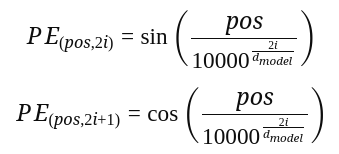

positional_encodings [0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]


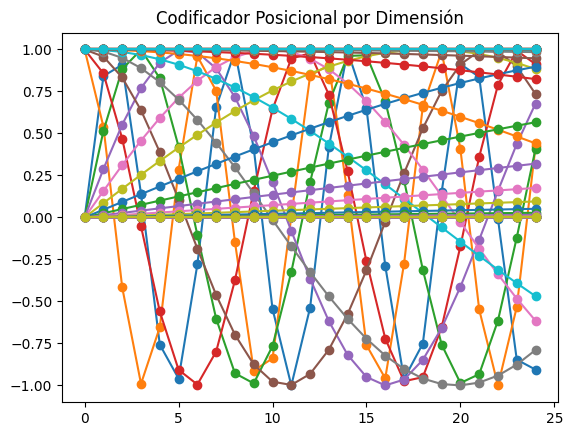

               dim_0     dim_1     dim_2     dim_3     dim_4     dim_5  \
yo          0.548814  1.715189  0.602763  1.544883  0.423655  1.645894   
estoy       1.000441  0.650677  1.171468  0.995290  0.485278  1.326146   
estudiando  1.634552  0.085178  1.839141  1.113254  0.976662  1.439703   
en          0.305814 -0.368514  1.575840  0.185205  1.704056  1.252201   
EDteam      0.107053 -0.536112  1.346154 -0.427514  1.638178  0.784869   
yo         -0.052369  1.057710  0.755231 -0.825454  1.401578  0.338507   
estoy      -0.092285  1.864154  0.438577 -0.537537  1.864721  0.273291   
estudiando  1.631243  1.744247 -0.193417 -0.635186  1.526101  0.029187   
en          1.060228  0.147294 -0.775181  0.043751  0.847723 -0.093537   
EDteam      0.414822 -0.263934 -0.387130  0.746218  1.447289 -0.857909   
yo         -0.369363 -0.511084 -0.084940  0.706895  0.818592 -0.499766   
estoy      -0.576284  0.861551 -0.207031  1.217191  0.323961 -0.596996   
estudiando  0.214449  1.771066  0.2382

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# multiplicador = 100
multiplicador = 5
tokens = multiplicador * ["yo", "estoy", "estudiando", "en", "EDteam"]

# en modelos reales pueden ser de 64, 128, 256, 512, 1024 o más
# d_model = 128
d_model = 60

np.random.seed(0)
embeddings = np.random.rand(len(tokens), d_model)

def positional_encoding(pos, d_model):
    pe = np.zeros(d_model)
    for i in range(0, d_model, 2):
        pe[i] = np.sin(pos / (10000 ** ((2 * i) / d_model)))
        if i + 1 < d_model:
            pe[i + 1] = np.cos(pos / (10000 ** ((2 * i) / d_model)))
    return pe


positional_encodings = np.array([positional_encoding(pos, d_model) for pos in range(len(tokens))])
print('positional_encodings', positional_encodings[0])


for dim in range(d_model):
    plt.plot(range(len(tokens)), positional_encodings[:, dim], marker='o', label=f'dim_{dim}')

plt.title('Codificador Posicional por Dimensión')
plt.show()

input_vectors = embeddings + positional_encodings

df = pd.DataFrame(input_vectors, index=tokens, columns=[f'dim_{i}' for i in range(d_model)])
print(df)


# Bloque atencional


### Ejemplo producto punto

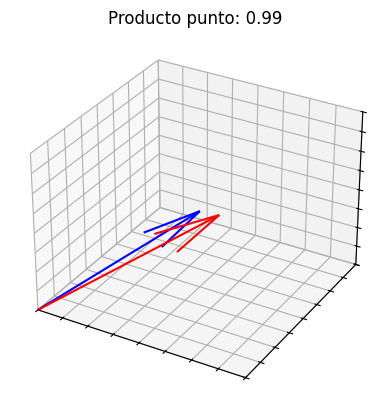

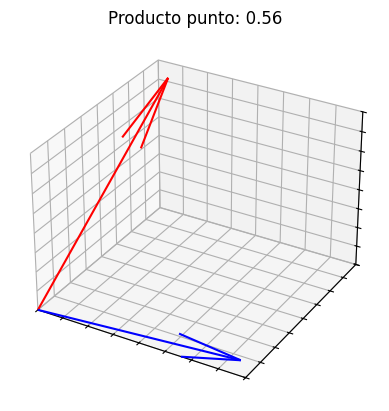

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Vectores cercanos
v1 = np.array([1, 1, 1])
v2 = np.array([1.3, 0.8, 1.2])
dot = np.dot(v1, v2)
max_dot = np.linalg.norm(v1) * np.linalg.norm(v2)
normalized_dot = (dot + max_dot) / (2 * max_dot)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0, 0, 0, *v1, color='b')
ax.quiver(0, 0, 0, *v2, color='r')
ax.set_title(f'Producto punto: {normalized_dot:.2f}')
ax.set_xlim([0, 2])
ax.set_ylim([0, 2])
ax.set_zlim([0, 2])
ax.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
plt.show()

# Vectores alejados
v1 = np.array([1.9, 0.1, 0.1])
v2 = np.array([0.1, 2, 1.8])
dot = np.dot(v1, v2)
max_dot = np.linalg.norm(v1) * np.linalg.norm(v2)
normalized_dot = (dot + max_dot) / (2 * max_dot)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0, 0, 0, *v1, color='b')
ax.quiver(0, 0, 0, *v2, color='r')
ax.set_title(f'Producto punto: {normalized_dot:.2f}')
ax.set_xlim([0, 2])
ax.set_ylim([0, 2])
ax.set_zlim([0, 2])
ax.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
plt.show()


## Multi Head attention


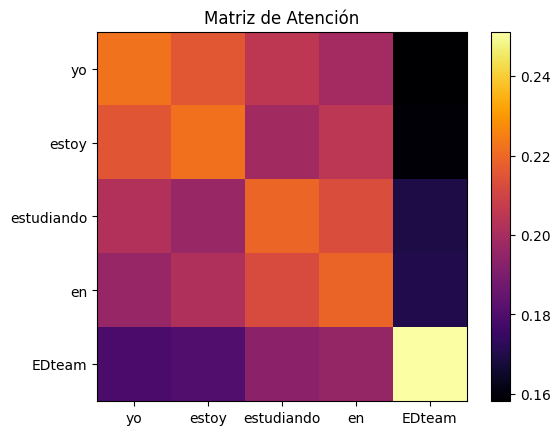

              yo  estoy  estudiando    en  EDteam
yo          0.22   0.22        0.21  0.20    0.16
estoy       0.22   0.22        0.20  0.20    0.16
estudiando  0.20   0.20        0.22  0.21    0.17
en          0.20   0.20        0.21  0.22    0.17
EDteam      0.18   0.18        0.19  0.20    0.25


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

tokens = ["yo", "estoy", "estudiando", "en", "EDteam"]
d_model = 6

embeddings = np.array([
    [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
    [0.2, 0.1, 0.4, 0.3, 0.6, 0.5],
    [0.3, 0.4, 0.1, 0.2, 0.5, 0.6],
    [0.4, 0.3, 0.2, 0.1, 0.6, 0.5],
    [0.5, 0.6, 0.4, 0.3, 0.2, 0.1]
])

scores = embeddings @ embeddings.T
attention = np.exp(scores) / np.exp(scores).sum(axis=1, keepdims=True)

plt.imshow(attention, cmap='inferno')
plt.colorbar()
plt.xticks(range(len(tokens)), tokens)
plt.yticks(range(len(tokens)), tokens)
plt.title('Matriz de Atención')
plt.show()

print(pd.DataFrame(np.round(attention, 2), index=tokens, columns=tokens))


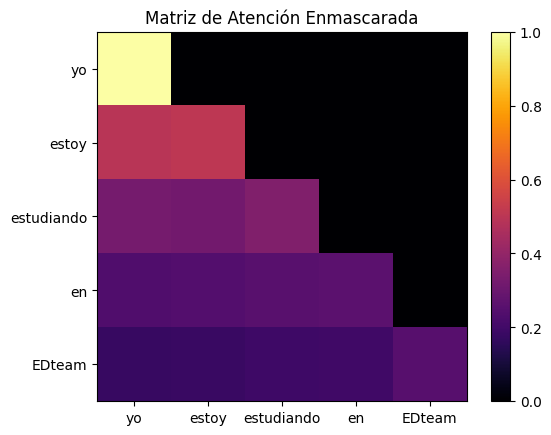

              yo  estoy  estudiando    en  EDteam
yo          1.00   0.00        0.00  0.00    0.00
estoy       0.49   0.51        0.00  0.00    0.00
estudiando  0.33   0.32        0.35  0.00    0.00
en          0.24   0.24        0.26  0.26    0.00
EDteam      0.18   0.18        0.19  0.20    0.25


In [ ]:
mask = np.triu(np.ones_like(scores), k=1)
scores_masked = np.where(mask == 0, scores, -np.inf)
attention_masked = np.exp(scores_masked) / np.nansum(np.exp(scores_masked), axis=1, keepdims=True)

plt.imshow(attention_masked, cmap='inferno')
plt.colorbar()
plt.xticks(range(len(tokens)), tokens)
plt.yticks(range(len(tokens)), tokens)
plt.title('Matriz de Atención Enmascarada')
plt.show()

print(pd.DataFrame(np.round(attention_masked, 2), index=tokens, columns=tokens))


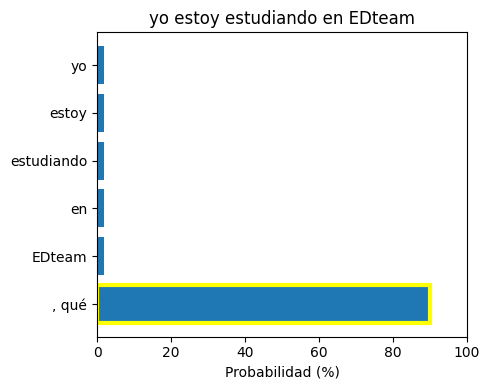

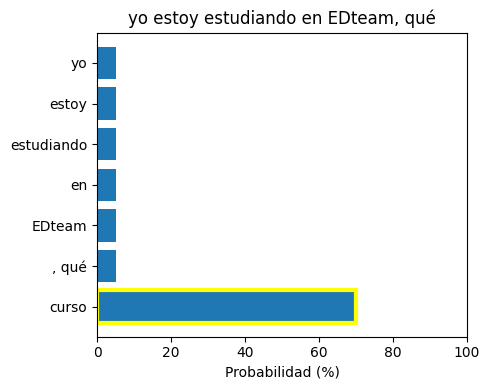

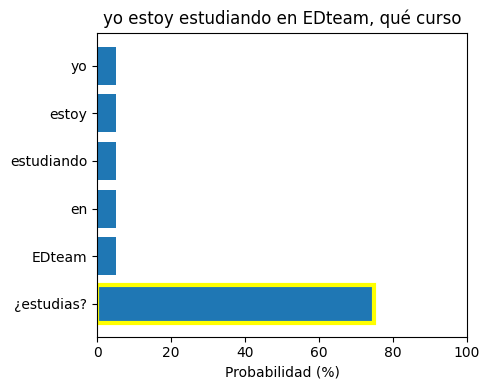

In [ ]:
cases = [
    {
        "tokens": ["yo", "estoy", "estudiando", "en", "EDteam", ", qué"],
        "probabilities": [0.02, 0.02, 0.02, 0.02, 0.02, 0.90],
        "title": "yo estoy estudiando en EDteam"
    },
    {
        "tokens": ["yo", "estoy", "estudiando", "en", "EDteam", ", qué", "curso"],
        "probabilities": [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.70],
        "title": "yo estoy estudiando en EDteam, qué"
    },
    {
        "tokens": ["yo", "estoy", "estudiando", "en", "EDteam", "¿estudias?"],
        "probabilities": [0.05, 0.05, 0.05, 0.05, 0.05, 0.75],
        "title": "yo estoy estudiando en EDteam, qué curso"
    }
]

for case in cases:
    tokens = case["tokens"]
    probs = case["probabilities"]
    probs_percent = [p * 100 for p in probs]

    plt.figure(figsize=(5, 4))
    bars = plt.barh(tokens[::-1], probs_percent[::-1])

    max_idx = probs.index(max(probs))
    bars[len(tokens) - 1 - max_idx].set_edgecolor("yellow")
    bars[len(tokens) - 1 - max_idx].set_linewidth(3)

    plt.xlim(0, 100)
    plt.xlabel("Probabilidad (%)")
    plt.title(case["title"])
    plt.tight_layout()
    plt.show()